# 1.0 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
import keras
from scipy.spatial.distance import cosine
from math import sqrt
from sklearn.metrics import mean_squared_error
import pickle

warnings.filterwarnings("ignore")

## 1.1 Reading Data from CSVs

In [2]:
df_books = pd.read_csv(r'C:\Users\hp\Downloads\ai_assignment\csvs\Books.csv')
df_users = pd.read_csv(r'C:\Users\hp\Downloads\ai_assignment\csvs\Users.csv')
df_ratings = pd.read_csv(r'C:\Users\hp\Downloads\ai_assignment\csvs\Ratings.csv')

# 2.0 Exploratory Data Analysis (EDA)
## 2.1 EDA for books
### 2.1.1 Basic Exploration of df_books
What is inside df_books

In [3]:
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


Information about df_books 

In [4]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Image for books are not required, hence dropped
Found out that Year-Of-Publication is Object ("String") instead of int64, due to errors in the csv where some data in the entries are shifted to the left by one column


In [5]:
df_books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], inplace=True)
df_books.loc[pd.to_numeric(df_books['Year-Of-Publication'], errors='coerce').isna(), 'Year-Of-Publication'] = 0

df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].astype('int64')
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271358 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


### 2.1.2 Cleaning of df_books
Showing statistical description of df_books

In [6]:
df_books.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271358,271360.000000,271358
unique,271360,242135,102022,NaN,16807
top,0195153448,Selected Poems,Agatha Christie,NaN,Harlequin
freq,1,27,632,NaN,7535
mean,NaN,NaN,NaN,1959.739151,NaN
std,NaN,NaN,NaN,258.075075,NaN
min,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,1989.000000,NaN
50%,NaN,NaN,NaN,1995.000000,NaN
75%,NaN,NaN,NaN,2000.000000,NaN


Showing if there is any missing values

In [7]:
pd.concat([df_books.isna().any(), df_books.isna().sum()], axis=1)

,0,1
ISBN,False,0
Book-Title,False,0
Book-Author,True,2
Year-Of-Publication,False,0
Publisher,True,2


#### <b> Cleaning object features ('Book-Author','Publisher') </b>
Found out that there is missing values in 'Book-Author' and 'Publisher'

Note that there are 102022 distinct book authors and 16807 distinct publishers

Showing books with missing authors

In [8]:
df_books[df_books['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


We would like to impute the missing authors with the mode author of the respective publisher of the book

In [9]:
df_books[df_books['Publisher'].isin(df_books[df_books['Book-Author'].isna()]['Publisher'])].groupby(
    ['Publisher', 'Book-Author'])[
    'Book-Author'].count().sort_values(ascending=False)

Publisher           Book-Author                        
Dorling Kindersley  Richard Addison                        10
                    David Taylor                            4
                    Miriam Stoppard                         4
                    Dorling Kindersley Publishing           3
                    Angela Wilkes                           3
                                                           ..
                    Elwyn Hartley Edwards                   1
                    Effie Romain                            1
                    Edward De Bono                          1
                    Dorling Kindersley Publishing Staff     1
                    William Lindsay                         1
Name: Book-Author, Length: 92, dtype: int64

Unfortunately, no other authors are observed for 'Edinburgh Financial Publishing'
We have no choice but to delete books with empty authors


In [10]:
df_books = df_books[~df_books['Book-Author'].isna()]

Showing books with missing publisher

In [11]:
df_books[df_books['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


We use the similar way to impute the missing publishers in the books, that is imputing with the mode of the publisher that the respective author belongs to

In [12]:
df_books[df_books['Book-Author'].isin(df_books[df_books['Publisher'].isna()]['Book-Author'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001,Novelbooks
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129001,0759901880,Wolfkin,Elaine Corvidae,2001,Hard Shell Word Factory
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


Again unfortunately, we have observed similar condition for books with missing publisher, specifically for 'Linnea Sinclair'

We have no choice but to delete books with missing publisher as well

In [13]:
df_books = df_books[~df_books['Publisher'].isna()]

#### <b> Cleaning numerical features ('Year-Of-Publication') </b>

As recalled in df_books.describe(include = 'all'), there exists 0 for 'Year-Of-Publication'

Defining a function to see the number of books with year of publication equals to 0

In [14]:
def show_num_books_zero_year_publication(df_books):
    num_of_zero_years = df_books[df_books['Year-Of-Publication'] == 0]['Year-Of-Publication'].count()
    num_of_books_total = df_books['Year-Of-Publication'].count()
    print(
        f"{num_of_zero_years} book(s) are found with zero 'Year-Of-Publication', out of {num_of_books_total} book(s) in total, comprising {num_of_zero_years / num_of_books_total * 100:.2f}%")

In [15]:
show_num_books_zero_year_publication(df_books)

4621 book(s) are found with zero 'Year-Of-Publication', out of 271356 book(s) in total, comprising 1.70%


Percentage of zero values is rather small, hence we would like to impute with following approaches

1. We consider to impute with the median of 'Year-Of-Publication' of respective authors
2. However, we still notice zero values in the aforementioned medians
3. Hence, we consider to impute the remaining with that of respective publishers
4. However, we still notice zero values
5. Lastly, we impute the remaining with median of the whole 'Year-Of-Publication' column

In [16]:
df_books.groupby('Book-Author')['Year-Of-Publication'].median().sort_values(ascending=True)

Book-Author
Jean Denis Bredin       0.0
R M Koster              0.0
Higgins                 0.0
J M Robertson           0.0
J Martyn Walsh          0.0
                      ...  
John Pitcher         2006.0
Cheng-En Wu          2011.0
Nikolaus Pevsner     2024.0
D. GIBBONS           2024.0
Coville              2030.0
Name: Year-Of-Publication, Length: 102021, dtype: float64

In [17]:
df_books.groupby('Publisher')['Year-Of-Publication'].median().sort_values(ascending=True)

Publisher
Messageries du Livre                    0.0
Slope Books                             0.0
Sirius Publishing                       0.0
Aidc                                    0.0
Barnes Noble                            0.0
                                      ...  
Kvsel-Verlag                         2004.0
Cockle Cove Pr                       2004.0
Security Resources Unlimited, LLC    2004.0
About Comics                         2004.0
Bausch &amp; Lombard                 2020.0
Name: Year-Of-Publication, Length: 16806, dtype: float64

Defining a function to impute missing values in 'Year-Of-Publication' as mentioned

In [18]:
def impute_year_of_publication(df_books):
    # Calculate median by grouping 'Book-Author','Publisher', and whole column
    median_by_authors = df_books.groupby('Book-Author')['Year-Of-Publication'].median()
    median_by_publisher = df_books.groupby('Publisher')['Year-Of-Publication'].median()
    median_whole_column = df_books['Year-Of-Publication'].median()

    # Impute with median_by_authors
    df_books = df_books.merge(median_by_authors.to_frame('Median-Year-By-Author'), how='left', on='Book-Author')
    df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].where(df_books['Year-Of-Publication'] != 0,
                                                                            df_books['Median-Year-By-Author'])
    df_books.drop('Median-Year-By-Author', axis=1, inplace=True)

    # Number of books with zero 'Year-Of-Publication' checking
    print("Imputation with median_by_authors completed !!")
    show_num_books_zero_year_publication(df_books)

    # Impute with median_by_publisher
    df_books = df_books.merge(median_by_publisher.to_frame('Median-Year-By-Publisher'), how='left', on='Publisher')
    df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].where(df_books['Year-Of-Publication'] != 0,
                                                                            df_books['Median-Year-By-Publisher'])
    df_books.drop('Median-Year-By-Publisher', axis=1, inplace=True)

    # Number of books with zero 'Year-Of-Publication' checking
    print("Imputation with median_by_publishers completed !!")
    show_num_books_zero_year_publication(df_books)

    # Impute with median_whole_column
    df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].replace(0, median_whole_column)

    # Number of books with zero 'Year-Of-Publication' checking
    print("Imputation with median_whole_column completed !!")
    show_num_books_zero_year_publication(df_books)

    return df_books

In [19]:
df_books = impute_year_of_publication(df_books)

Imputation with median_by_authors completed !!
1754 book(s) are found with zero 'Year-Of-Publication', out of 271356 book(s) in total, comprising 0.65%
Imputation with median_by_publishers completed !!
1147 book(s) are found with zero 'Year-Of-Publication', out of 271356 book(s) in total, comprising 0.42%
Imputation with median_whole_column completed !!
0 book(s) are found with zero 'Year-Of-Publication', out of 271356 book(s) in total, comprising 0.00%


Showing description of df_books after imputation of 'Year-Of-'Publication'

In [20]:
df_books.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271356,271356,271356,271356.000000,271356
unique,271356,242132,102021,NaN,16806
top,0195153448,Selected Poems,Agatha Christie,NaN,Harlequin
freq,1,27,632,NaN,7535
mean,NaN,NaN,NaN,1992.069422,NaN
std,NaN,NaN,NaN,40.776675,NaN
min,NaN,NaN,NaN,976.500000,NaN
25%,NaN,NaN,NaN,1989.000000,NaN
50%,NaN,NaN,NaN,1995.000000,NaN
75%,NaN,NaN,NaN,2000.000000,NaN


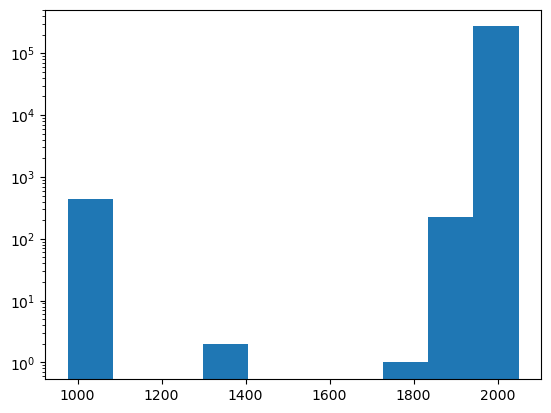

In [21]:
plt.hist(df_books['Year-Of-Publication'])
plt.yscale('log')
plt.show()

We still find some non-zero undesired values for 'Year-Of-Publication', hence we drop values less than 1900 and more than 2024

In [22]:
df_books = df_books[(df_books['Year-Of-Publication'] >= 1900) & (df_books['Year-Of-Publication'] <= 2024)]
df_books.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,270905,270905,270905,270905.000000,270905
unique,270905,241733,101966,NaN,16763
top,0195153448,Selected Poems,Agatha Christie,NaN,Harlequin
freq,1,27,632,NaN,7535
mean,NaN,NaN,NaN,1993.673002,NaN
std,NaN,NaN,NaN,8.113565,NaN
min,NaN,NaN,NaN,1900.000000,NaN
25%,NaN,NaN,NaN,1989.000000,NaN
50%,NaN,NaN,NaN,1996.000000,NaN
75%,NaN,NaN,NaN,2000.000000,NaN


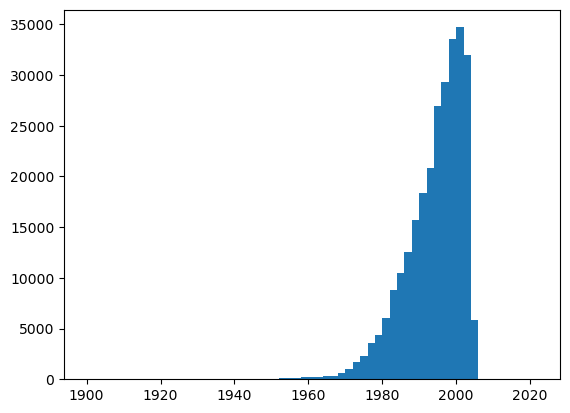

In [23]:
plt.hist(df_books['Year-Of-Publication'], bins=np.arange(1900, 2024, 2))
plt.show()

## 2.2 EDA for users

### 2.2.1 Basic Exploration of df_users
What is inside df_users

In [24]:
df_users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


Information about df_users

In [25]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


### 2.2.2 Cleaning of df_users

Showing statistical description of df_users

In [26]:
df_users.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


Showing if there is any missing values

In [27]:
pd.concat([df_users.isna().any(), df_users.isna().sum()], axis=1)

,0,1
User-ID,False,0
Location,False,0
Age,True,110762


#### <b> Cleaning numerical features ('Age') </b>

Found out that there is missing values for 'Age'
Showing the number of missing values in 'Age'

In [28]:
print(
    f"{df_users['Age'].isna().sum()} user(s) have their age missing, out of {df_users['Age'].count()} user(s), comprising {(df_users['Age'].isna().sum() / df_users['Age'].count()) * 100:.2f}% of total users")

110762 user(s) have their age missing, out of 168096 user(s), comprising 65.89% of total users


As observed the proportion of missing values in 'Age' is extremely high, hence we drop the 'Age' column

In [29]:
df_users.drop(columns=['Age'], inplace=True)

## 2.3 EDA for ratings

### 2.3.1 Basic Exploration of df_ratings
What is inside df_ratings

In [30]:
df_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Information about df_ratings

In [31]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### 2.3.2 Cleaning of df_ratings

Showing statistical description of df_ratings

In [32]:
df_ratings.describe(include='all')

,User-ID,ISBN,Book-Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


Showing if there is any missing values

In [33]:
pd.concat([df_ratings.isna().any(), df_ratings.isna().sum()], axis=1)

,0,1
User-ID,False,0
ISBN,False,0
Book-Rating,False,0


#### <b> Cleaning of numerical features ('Book-Rating')</b>

As observed, although ratings shall be in 1 to 10 inclusive, there are still some records with their ratings equals 0

This means that the particular user has viewed the book but did not give a rating (as indicated in Kaggle)

However, implicit ratings in not in the scope of this project, so zero ratings are dropped

In [34]:
df_ratings = df_ratings[df_ratings['Book-Rating'] != 0]

## 2.4 Merging Data

Before we proceed, we merge all cleaned dataframes together

# 3.0 Collaborative Filtering Recommender System

## 3.1 User-Based Collaborative Filtering

We will build a user-based collaborative filtering recommender system as a part of the hybrid recommender system

We will be using Singular Vector Decomposition (SVD) as the prediction model, the training process, is shown as follows

1. Merging df_books and df_users into a dataframe
2. Further cleaning and filtering of data
3. Fitting the model to data
4. Filtering out the top-k significant latent factors
 
### 3.1.1 Further Cleaning and Filtering of Data

Showing 'Year-Of-Publication' of books rated by the users

In [35]:
df_final = df_books.merge(df_ratings, on='ISBN').merge(df_users, on='User-ID')
df_final.to_csv(r'C:\Users\hp\Downloads\ai_assignment\hybrid_code\hybrid_csvs\df_final.csv', index=False)
df_final

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5,"timmins, ontario, canada"
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,8,"n/a, n/a, n/a"
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544,8,"toronto, ontario, canada"
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866,9,"ottawa, ,"
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629,9,"kingston, ontario, canada"
...,...,...,...,...,...,...,...,...
383445,0395264707,Dreamsnake,Vonda N. McIntyre,1978.0,Houghton Mifflin,275318,10,"klamath falls, oregon, usa"
383446,1845170423,Cocktail Classics,David Biggs,2004.0,Connaught,275970,7,"pittsburgh, pennsylvania, usa"
383447,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993.0,Ballantine Books,276313,5,"livermore, california, usa"
383448,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),276463,7,"providence, rhode island, usa"


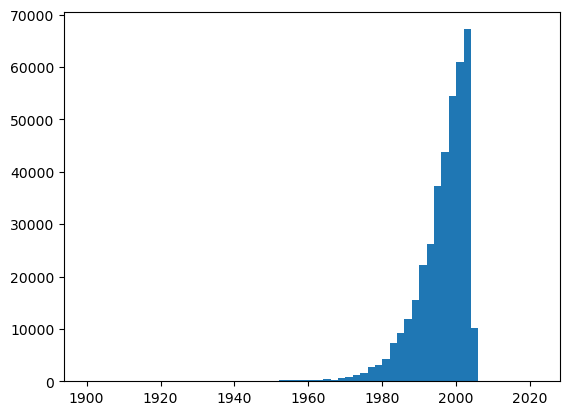

In [36]:
plt.hist(df_final['Year-Of-Publication'], bins=np.arange(1900, 2024, 2))
plt.show()

Showing the ratings of users

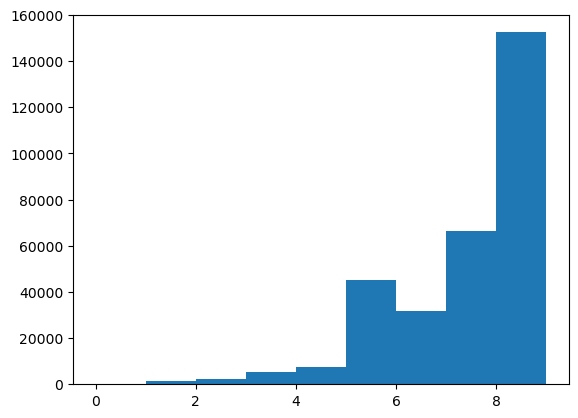

In [37]:
plt.hist(df_final['Book-Rating'], bins=np.arange(0, 10, 1))
plt.show()

Showing the number of ratings of users

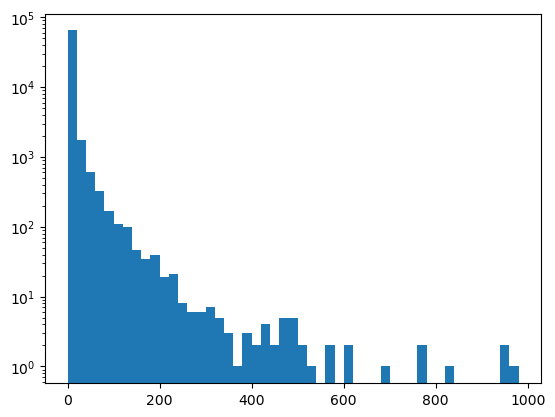

In [38]:
plt.hist(df_final.groupby('User-ID')['Book-Rating'].count(), bins=np.arange(0, 1000, 20))
plt.yscale('log')
plt.show()

As observed a large number users rated for a few times only, these are considered 'unknowledgeable' users, which do not play an important role in the collaborative effort to recommend books
Hence, we will drop the records of these users, with 200 ratings set as the threshold

In [39]:
user_ratings_count = df_final.groupby('User-ID')['Book-Rating'].count()
knowledgeable_users_index = user_ratings_count[user_ratings_count > 200].index
df_collaborative = df_final[df_final['User-ID'].isin(knowledgeable_users_index)]

Scaling 'Book-Rating' with a StandardScaler

In [40]:
scaler = StandardScaler()

df_collaborative['Book-Rating-Scaled'] = scaler.fit_transform(df_collaborative[['Book-Rating']])

scaler_mean = scaler.mean_[0]
scaler_std = scaler.scale_[0]

df_collaborative.to_csv(r'C:\Users\hp\Downloads\ai_assignment\hybrid_code\hybrid_csvs\df_collaborative.csv')
with open(r'C:\Users\hp\Downloads\ai_assignment\hybrid_code\embeddings\scaler.json', 'w') as f:
    json.dump({'scaler_mean':scaler_mean, 'scaler_std': scaler_std}, f)

### 3.1.2 Fitting Model to Data

Starting to build model using SVD

In [41]:
df_collaborative_pivot = df_collaborative.pivot_table(index='User-ID', columns='ISBN',
                                                           values='Book-Rating-Scaled').fillna(0)
df_collaborative_sparse = csr_matrix(df_collaborative_pivot)

n_latent_factors = df_collaborative_sparse.shape[0] - 1
u, sigma, vt = svds(df_collaborative_sparse, n_latent_factors)

np.save(r'C:\Users\hp\Downloads\ai_assignment\hybrid_code\svds\u.npy', u)
np.save(r'C:\Users\hp\Downloads\ai_assignment\hybrid_code\svds\sigma.npy', sigma)
np.save(r'C:\Users\hp\Downloads\ai_assignment\hybrid_code\svds\vt.npy', vt)

### 3.1.4 Filtering Top-k Significant Latent Features

Proportion plot for determining elbow point for k

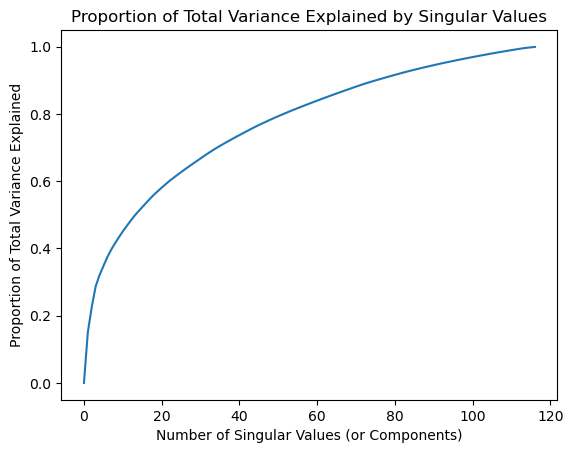

In [42]:
total_sigma = [np.sum(sigma[len(sigma) - i:] ** 2) / np.sum(sigma ** 2) for i in range(len(sigma))]

plt.plot(total_sigma)
plt.title("Proportion of Total Variance Explained by Singular Values")
plt.xlabel("Number of Singular Values (or Components)")
plt.ylabel("Proportion of Total Variance Explained")
plt.show()

### 3.1.3 Making Predictions

The process for making prediction is shown as follows

1. Finding user-item interaction for the target user and impute with 0 if interaction not found
2. Finding n nearest neighbours for the target user using cosine similarity
3. Getting recommendations for neighbours
4. Calculating weighted average for ratings in recommendations and returning the top-10 books to the target user

#### 3.1.3.1 Finding User-item Interaction for Target User

In [43]:
def get_target_user_interaction(user_id):
    mean = scaler_mean
    std = scaler_std
    df_database_interaction = pd.DataFrame()

    df_past_interaction = pd.DataFrame()
    if user_id in df_collaborative_pivot.index:
        df_past_interaction = df_collaborative_pivot.loc[user_id].reset_index().rename(columns={'ISBN':'ISBN',user_id:'Past Rating'})

    df_other_interaction = pd.DataFrame()
    if user_id in df_final['User-ID']:
        df_other_interaction = df_final[(df_final['ISBN'].isin(df_collaborative_pivot.columns)) & (df_final['User-ID'] == user_id)][['ISBN','Book-Rating']].rename(columns={'ISBN':'ISBN','Book-Rating':'Other Rating'})
        df_other_interaction['Other Rating'] = (df_other_interaction['Other Rating'] - mean) / std
    
    df_all_interaction = pd.DataFrame()
    df_all_interaction['ISBN'] = df_collaborative_pivot.columns
    df_all_interaction['Default Rating'] = (0 - mean) / std
    
    if not df_past_interaction.empty:
        df_all_interaction = df_past_interaction.copy()
    if not df_other_interaction.empty:
            df_all_interaction = pd.merge(df_all_interaction, df_other_interaction, how='left', on='ISBN')
            df_all_interaction = df_all_interaction.fillna((0 - mean) / std)
    if not df_database_interaction.empty:
            df_all_interaction = pd.merge(df_all_interaction, df_database_interaction, how='left', on='ISBN')
            df_all_interaction = df_all_interaction.fillna((0 - mean) / std)


    if not df_past_interaction.empty:
        df_all_interaction['Max'] = df_all_interaction['Past Rating'].values
        if not df_other_interaction.empty:
            df_all_interaction['Max'] = df_all_interaction['Past Rating'].where(df_all_interaction['Past Rating'] > df_all_interaction['Other Rating'], df_all_interaction['Other Rating'])
        if not df_database_interaction.empty:
            df_all_interaction['Max'] = df_all_interaction['Max'].where(df_all_interaction['Max'] > df_all_interaction['Database Rating'], df_all_interaction['Database Rating'])
    elif not df_other_interaction.empty:
        df_all_interaction['Max'] = df_all_interaction['Other Rating'].values
        if not df_database_interaction.empty:
            df_all_interaction['Max'] = df_all_interaction['Other Rating'].where(df_all_interaction['Other Rating'] > df_all_interaction['Database Rating'], df_all_interaction['Database Rating'])
    elif not df_database_interaction.empty:
        df_all_interaction['Max'] = df_all_interaction['Database Rating'].values
    else:
        return None

    df_all_interaction = df_all_interaction.set_index('ISBN')
    return df_all_interaction['Max']

#### 3.1.3.2 Finding n Nearest Neighbours

Defining the function to find n nearest neighbours for the target user

In [44]:
def find_n_nearest_neighbours_with_cosine_similarity(user_id, target_user_interaction, n=7):
    neighbours_distance = pd.Series([1 - cosine(target_user_interaction, df_collaborative_pivot.loc[neighbour_id]) for neighbour_id in df_collaborative_pivot.index])
    neighbours_distance.name = 'Cosine Similarity'
    
    add = 1 if user_id in df_collaborative_pivot.index else 0
    return pd.concat([neighbours_distance, pd.Series(df_collaborative_pivot.index)], axis=1).sort_values(by='Cosine Similarity', ascending=False)[add : n + add]

#### 3.1.3.3 Getting Recommendations for Neighbours

Defining the function to get recommendations for neighbours

In [45]:
def get_recommendations(user_id):
    user_latent_factors = u[df_collaborative_pivot.index.get_loc(user_id)]
    predicted_ratings = np.dot(user_latent_factors, np.dot(np.diag(sigma), vt))
    predicted_ratings_scaled = scaler.inverse_transform(predicted_ratings.reshape(-1, 1))[:, 0]
    return pd.Series(predicted_ratings_scaled, index=df_collaborative_pivot.columns).sort_values(ascending=False)

def get_all_neighbours_recommendations(neighbour_ids):
    all_neighbours_recommendations = pd.DataFrame()
    for neighbour_id in neighbour_ids:
        neighbour_recommendations = get_recommendations(neighbour_id)
        neighbour_recommendations.name = neighbour_id
        all_neighbours_recommendations = pd.concat([all_neighbours_recommendations,neighbour_recommendations], axis=1)
    return all_neighbours_recommendations

#### 3.1.3.4 Calculating Weighted Average for Ratings

Defining the function to calculate weighted average for ratings

In [46]:
def get_collaborative_weighted_recommendations(df_neighbours,df_all_neighbour_recommendations):
    df_all_with_weights = pd.merge(df_neighbours, df_all_neighbour_recommendations.stack().reset_index(name = 'Predicted Rating').rename(columns = {'level_0':'ISBN','level_1':'User-ID'}), on = 'User-ID')
    df_all_with_weights['Weighted Sum'] = df_all_with_weights['Cosine Similarity'] * df_all_with_weights['Predicted Rating']
    return df_all_with_weights.groupby('ISBN')['Weighted Sum'].sum() / df_all_with_weights.groupby('ISBN')['Cosine Similarity'].sum()

#### 3.1.3.5 Calling functions

Calling function to perform the processes mentioned

In [47]:
target_user = 76499

def get_collaborative_recommendations(user_id, n = 7):
    target_user_interaction = get_target_user_interaction(user_id)
    if target_user_interaction is not None:
        df_neighbours = find_n_nearest_neighbours_with_cosine_similarity(user_id, target_user_interaction, n = n)
        df_all_neighbour_recommendations = get_all_neighbours_recommendations(df_neighbours['User-ID'])
        return get_collaborative_weighted_recommendations(df_neighbours, df_all_neighbour_recommendations), df_neighbours['Cosine Similarity'].mean()
    else:
        return None, 0

single_svd_recommendation, _ = get_collaborative_recommendations(target_user)
single_svd_recommendation

ISBN
0000913154    7.798737
0001046438    7.798737
000104687X    7.798736
0001047213    7.798737
0001047973    7.798737
                ...   
B00001U0CP    7.798739
B00005TZWI    7.798738
B00007FYKW    7.798737
B0000T6KHI    7.798725
B000234N3A    7.972405
Length: 44247, dtype: float64

### 3.1.4 Model Evaluation

We evaluate the performance of our SVD model with Root Mean Squared Error (RSME)

In [48]:
def get_df_svd_evaluation(minimum_rating_count = 125, n = 7):
    df_svd_evaluation_predictions = pd.DataFrame()

    evaluation_user_index = df_final.groupby('User-ID')['Book-Rating'].count()
    svd_evaluation_users =  df_final[df_final['User-ID'].isin(evaluation_user_index[evaluation_user_index > minimum_rating_count].index)]
    
    for user_id in svd_evaluation_users['User-ID'].unique():
        single_svd_recommendation, _ = get_collaborative_recommendations(user_id, n = n)
        if single_svd_recommendation is None:
            continue
        single_svd_recommendation = single_svd_recommendation.reset_index().rename(columns = {'ISBN':'ISBN', 0:'SVD Predicted Rating'})
        single_svd_recommendation['User-ID'] = user_id
        df_svd_evaluation_predictions = pd.concat([df_svd_evaluation_predictions, single_svd_recommendation], axis = 0)

    df_svd_evaluation = pd.DataFrame(df_final[['ISBN','Book-Rating','User-ID']])
    df_svd_evaluation = df_svd_evaluation.merge(df_svd_evaluation_predictions,on=['ISBN','User-ID'],how='inner')
    return df_svd_evaluation

def get_svd_rmse(minimum_rating_count = 125, n = 7):
    df_svd_evaluation = get_df_svd_evaluation(minimum_rating_count = minimum_rating_count, n = n)
    rmse = sqrt(mean_squared_error(df_svd_evaluation['SVD Predicted Rating'], df_svd_evaluation['Book-Rating']))
    print(f"Root mean square error (RMSE) for Collaborative Filtering with n = {n}: {rmse:.4f}")

We now evaluate with n = 10

In [49]:
get_svd_rmse(n = 10)

Root mean square error (RMSE) for Collaborative Filtering with n = 10: 1.8145


### 3.1.4 Model Fine-Tuning

We fine tune the SVD model with different number of n

In [50]:
for i in [3, 5, 7]:
    get_svd_rmse(n = i)

Root mean square error (RMSE) for Collaborative Filtering with n = 3: 1.8183
Root mean square error (RMSE) for Collaborative Filtering with n = 5: 1.8153
Root mean square error (RMSE) for Collaborative Filtering with n = 7: 1.8139


Hence, we can conclude that collaborative filtering with n = 7 works the best

# 4.0 Content Based Filtering Recommender System

## 4.1 Multilayer Perceptron (MLP) Model

We will build a content-based collaborative filtering recommender system as another part of the hybrid recommender system

We will be using multiplayer perceptron with Sequential from Keras, as the prediction model, the training process, is shown as follows

 
### 4.1.1 Further Cleaning and Filtering of Data

Showing top 20 most rated books


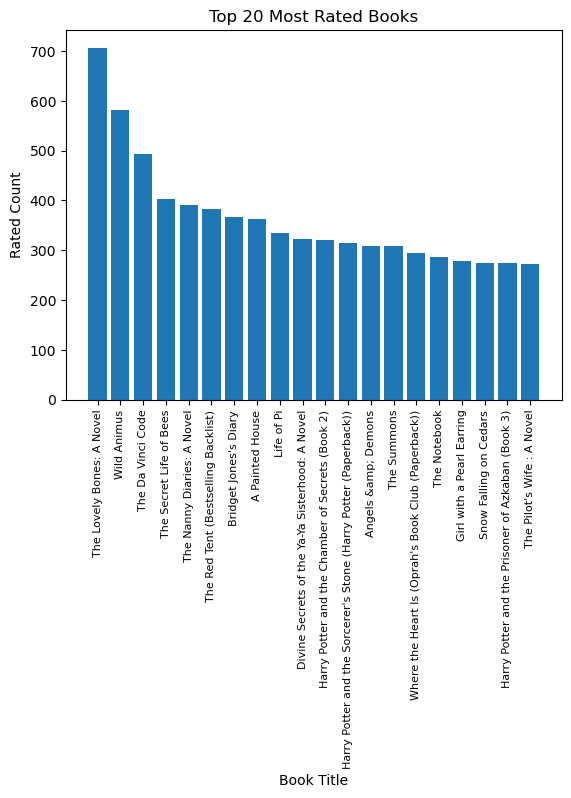

In [51]:
top_books = df_final.groupby('Book-Title')['User-ID'].nunique().sort_values(ascending=False).head(20)
df_top_books = pd.DataFrame({'Book Title': top_books.index, 'Rated Count': top_books.values})
plt.bar(df_top_books['Book Title'], df_top_books['Rated Count'])
plt.title('Top 20 Most Rated Books')
plt.xlabel('Book Title')
plt.ylabel('Rated Count')
plt.xticks(rotation=90, fontsize=8)
plt.show()

Showing top 20 authors with the most written books

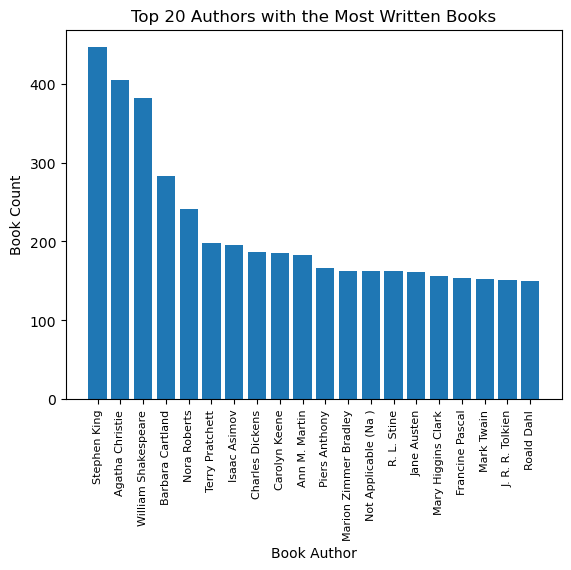

In [52]:
top_authors = df_final.groupby('Book-Author')['ISBN'].nunique().sort_values(ascending=False).head(20)
df_top_authors = pd.DataFrame({'Book Author': top_authors.index, 'Book Count': top_authors.values})
plt.bar(df_top_authors['Book Author'], df_top_authors['Book Count'])
plt.title('Top 20 Authors with the Most Written Books')
plt.xlabel('Book Author')
plt.ylabel('Book Count')
plt.xticks(rotation=90, fontsize=8)
plt.show()

Showing top 20 locations where most users staying

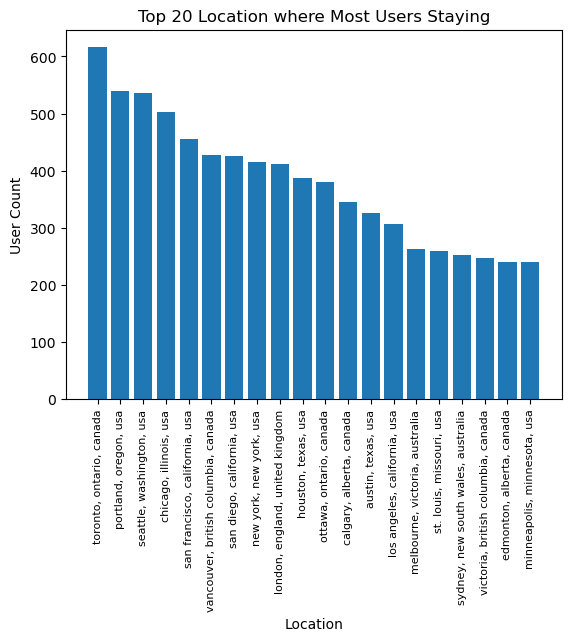

In [53]:
top_locations = df_final.groupby('Location')['User-ID'].nunique().sort_values(ascending=False).head(20)
df_top_locations = pd.DataFrame({'Location': top_locations.index, 'User Count': top_locations.values})
plt.bar(df_top_locations['Location'], df_top_locations['User Count'])
plt.title('Top 20 Location where Most Users Staying')
plt.xlabel('Location')
plt.ylabel('User Count')
plt.xticks(rotation=90, fontsize=8)
plt.show()

### 4.1.2 Fitting Model to Data

We first embed the text features ('Book-Title', 'Book-Author', 'Publisher', 'Location') with term frequency inverse document frequency (TFIDF) vectorizer

In [54]:
df_content = df_final.copy()

tfidf_vectorizer = TfidfVectorizer(max_features=200, stop_words='english', ngram_range=(2,2))
text_features = ['Book-Title', 'Book-Author', 'Publisher', 'Location']

df_content_text_features = df_content[text_features].astype(str).apply(lambda x: ' '.join(x), axis = 1)
df_content_text_tfidf = tfidf_vectorizer.fit_transform(df_content_text_features)

pickle.dump(tfidf_vectorizer, open(r'C:\Users\hp\Downloads\ai_assignment\hybrid_code\embeddings\tfidf_vectorizer.pickle', 'wb'))

df_content_features = pd.DataFrame(df_content_text_tfidf.todense(), columns = tfidf_vectorizer.get_feature_names_out())
df_content_features = pd.concat([df_content_features, df_content['Year-Of-Publication']], axis = 1)
df_content_ratings = df_content['Book-Rating']
df_content_features

,ace books,alabama usa,alaska usa,alberta canada,alfred knopf,amp company,amp schuster,andrews mcmeel,anne rice,antonio texas,...,washington usa,west virginia,westfalen germany,william morrow,wisconsin usa,wuerttemberg germany,york new,york usa,zebra books,Year-Of-Publication
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1978.0
383446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2004.0
383447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1993.0
383448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1988.0


We split the features into training and validation sets

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_content_features, df_content_ratings, test_size=0.2)

We start to build the model with the embeddings we have constructed

In [56]:
mlp_model = Sequential()
mlp_model.add(Input(shape=(df_content_features.shape[1],)))
mlp_model.add(Dense(units=128, activation='relu'))
mlp_model.add(Dense(units=64, activation='relu'))
mlp_model.add(Dense(units=1))

mlp_model.compile(loss='mean_squared_error', optimizer='Adam')
mlp_history = mlp_model.fit(X_train, y_train, batch_size=64, epochs=120, validation_data=(X_test, y_test))
mlp_model.save(r'C:\Users\hp\Downloads\ai_assignment\hybrid_code\keras\mlp_model.keras')

Epoch 1/120
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 19.3531 - val_loss: 6.7892
Epoch 2/120
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 4.7804 - val_loss: 9.5318
Epoch 3/120
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 4.9225 - val_loss: 3.8589
Epoch 4/120
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.7955 - val_loss: 3.3101
Epoch 5/120
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.5217 - val_loss: 3.4273
Epoch 6/120
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 3.4129 - val_loss: 3.4403
Epoch 7/120
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.3757 - val_loss: 3.3531
Epoch 8/120
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.3740 - val_loss: 3.3931
Epoch 9/120
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 3.3490 - val_loss: 3.3177
Epoch 10/120
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.3344 - val_loss: 3.3784
Epoch 11/120
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.3371 - val_loss: 3.3142
Epoch 12/120
47

Showing the learning curve of the model

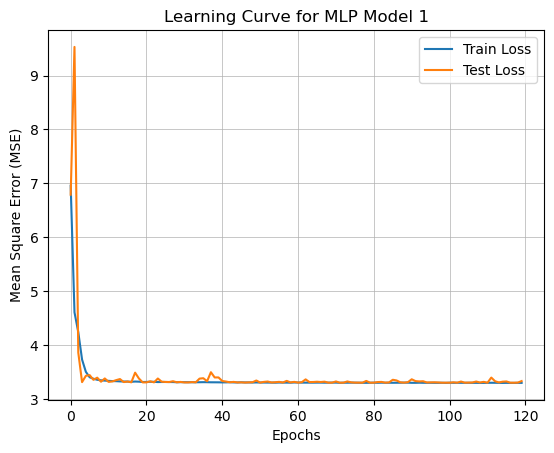

In [57]:
train_loss = mlp_history.history['loss']
test_loss = mlp_history.history['val_loss']

epochs = range(len(train_loss))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.title('Learning Curve for MLP Model 1')
plt.ylabel('Mean Square Error (MSE)')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True, linewidth=0.5)
plt.show()

### 4.1.3 Model Fine-Tuning

We fine tune the MLP model with different number of nodes in the hidden layer

Epoch 1/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 38.7594 - val_loss: 3.3160
Epoch 2/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 4.0770 - val_loss: 3.5345
Epoch 3/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 3.4212 - val_loss: 3.3431
Epoch 4/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 3.3773 - val_loss: 3.3652
Epoch 5/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 9s 977us/step - loss: 3.3448 - val_loss: 3.3233
Epoch 6/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 9s 896us/step - loss: 3.3615 - val_loss: 3.3314
Epoch 7/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 9s 913us/step - loss: 3.3438 - val_loss: 3.3443
Epoch 8/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 9s 923us/step - loss: 3.3468 - val_loss: 3.3802
Epoch 9/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 9s 920us/step - loss: 3.3378 - val_loss: 3.4149
Epoch 10/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 3.3130 - val_loss: 3.3199
Epoch 11/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 3.3230 - val_loss: 3.3152
Ep

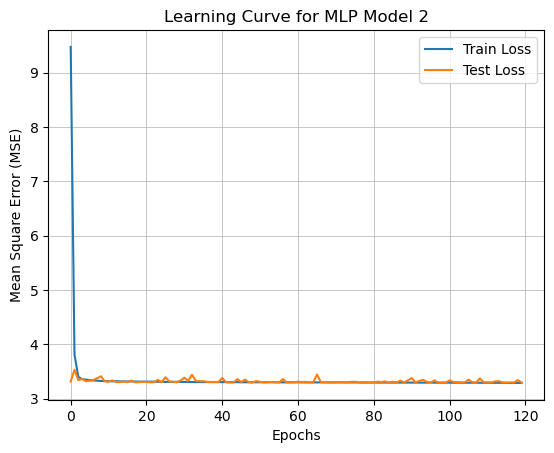

In [58]:
mlp_model_2 = Sequential()
mlp_model_2.add(Input(shape=(df_content_features.shape[1],)))
mlp_model_2.add(Dense(units=128, activation='relu'))
mlp_model_2.add(Dense(units=128, activation='relu'))
mlp_model_2.add(Dense(units=1))

mlp_model_2.compile(loss='mean_squared_error', optimizer='Adam')
mlp_history_2 = mlp_model_2.fit(X_train, y_train, batch_size=32, epochs=120, validation_data=(X_test, y_test))
mlp_model_2.save(r'C:\Users\hp\Downloads\ai_assignment\hybrid_code\keras\mlp_model_2.keras')

train_loss = mlp_history_2.history['loss']
test_loss = mlp_history_2.history['val_loss']

epochs = range(len(train_loss))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.title('Learning Curve for MLP Model 2')
plt.ylabel('Mean Square Error (MSE)')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True, linewidth=0.5)
plt.show()

Epoch 1/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 11.0616 - val_loss: 3.7124
Epoch 2/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 3.8125 - val_loss: 3.4532
Epoch 3/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 3.4491 - val_loss: 3.3301
Epoch 4/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 3.3810 - val_loss: 3.3918
Epoch 5/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 3.3574 - val_loss: 3.4603
Epoch 6/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 3.3491 - val_loss: 3.4431
Epoch 7/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 3.3455 - val_loss: 3.3851
Epoch 8/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 3.3351 - val_loss: 3.3173
Epoch 9/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 3.3416 - val_loss: 3.3107
Epoch 10/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 3.3396 - val_loss: 3.3367
Epoch 11/120
9587/9587 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 3.3214 - val_loss: 3.4935
Epoch 1

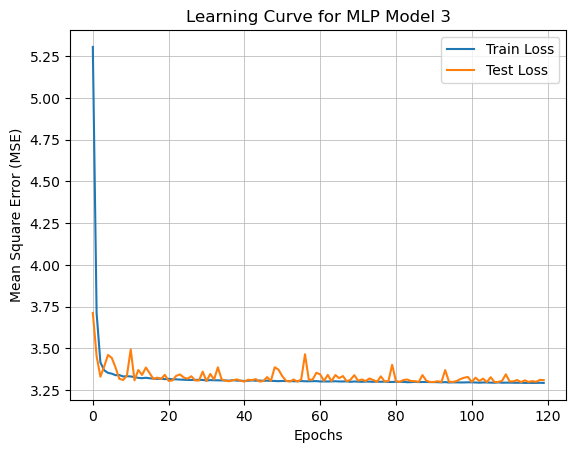

In [59]:
mlp_model_3 = Sequential()
mlp_model_3.add(Input(shape=(df_content_features.shape[1],)))
mlp_model_3.add(Dense(units=64, activation='relu'))
mlp_model_3.add(Dense(units=64, activation='relu'))
mlp_model_3.add(Dense(units=1))

mlp_model_3.compile(loss='mean_squared_error', optimizer='Adam')
mlp_history_3 = mlp_model_3.fit(X_train, y_train, batch_size=32, epochs=120, validation_data=(X_test, y_test))
mlp_model_3.save(r'C:\Users\hp\Downloads\ai_assignment\hybrid_code\keras\mlp_model_3.keras')

train_loss = mlp_history_3.history['loss']
test_loss = mlp_history_3.history['val_loss']

epochs = range(len(train_loss))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.title('Learning Curve for MLP Model 3')
plt.ylabel('Mean Square Error (MSE)')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True, linewidth=0.5)
plt.show()

Hence, we can conclude that mlp_model_3 is the best tuned model

### 4.1.3 Making Predictions

The process for making predictions is shown as follows:
1. Finding the location of the target user
2. Combining with book features (book title, author, publisher, and year of publication)
3. Embedding text features(book title, author, publisher, user location) with TFIDF vectorizer
4. Predicting using the model and returning the top-10 books to the target user

#### 4.1.3.1 Getting User Location

Defining a function to get the location of target user

In [60]:
def get_user_location(user_id):
    if user_id in df_final['User-ID']:
        return df_final[df_final['User-ID'] == user_id ]['Location'].iloc[0]
    else:
        return 'n/a, n/a, n/a'

#### 4.1.3.2 Embedding Text Features

Defining a function to embed text features with TFIDF vectorizer

In [61]:
def get_embedded_features(user_location):
    with open(r'C:\Users\hp\Downloads\ai_assignment\hybrid_code\embeddings\tfidf_vectorizer.pickle', 'rb') as f:
        tfidf_vectorizer = pickle.load(f)
    df_target = df_final.drop_duplicates(subset=['ISBN'])
    df_target_text_features = df_target[['Book-Title','Book-Author','Publisher']]
    df_target_text_features['Location'] = user_location
    df_target_text_features = df_target_text_features[text_features].apply(lambda x: ' '.join(x), axis = 1)
    df_target_tfidf = tfidf_vectorizer.transform(df_target_text_features)

    df_target_features = pd.DataFrame(df_target_tfidf.todense(),columns = tfidf_vectorizer.get_feature_names_out())
    df_target_features['Year-Of-Publication'] = df_target['Year-Of-Publication'].values
    return df_target_features

#### 4.1.3.3 Getting MLP Recommendations

Defining a function to get recommendations from the MLP model to the target user

In [62]:
def get_content_recommendations(user_id):
    best_mlp_model = keras.models.load_model(r'C:\Users\hp\Downloads\ai_assignment\hybrid_code\keras\mlp_model_2.keras')
    # TODO: Check if in session state first
    location = get_user_location(user_id)
    df_embedded_features = get_embedded_features(location)

    predictions = best_mlp_model.predict(df_embedded_features)
    predictions = pd.Series(predictions.flatten())
    predictions.name = 'MLP Predicted Rating'
    predictions.index = df_final.drop_duplicates(subset=['ISBN'])['ISBN']
    return predictions

#### 4.1.3.4 Calling Functions
Calling functions to make predictions for a single user

In [63]:
target_user = 11676

single_mlp_recommendation = get_content_recommendations(target_user)
single_mlp_recommendation

4675/4675 ━━━━━━━━━━━━━━━━━━━━ 3s 569us/step


ISBN
0002005018    7.498726
0060973129    7.494675
0374157065    7.497916
0399135782    7.303052
0425176428    7.337968
                ...   
0395264707    7.952619
1845170423    7.499942
0449906736    7.508703
0440400988    7.578808
0525447644    7.494675
Name: MLP Predicted Rating, Length: 149582, dtype: float32

### 4.1.4 Model Evaluation

We evaluate the performance of our MLP model with Root Mean Square Error (RSME)

In [65]:
def get_df_mlp_evaluation(minimum_rating_count = 125):
    df_mlp_evaluation_predictions = pd.DataFrame()

    evaluation_user_index = df_final.groupby('User-ID')['Book-Rating'].count()
    mlp_evaluation_users =  df_final[df_final['User-ID'].isin(evaluation_user_index[evaluation_user_index > minimum_rating_count].index)]

    for user_id in mlp_evaluation_users['User-ID'].unique():
        single_mlp_recommendation = get_content_recommendations(user_id)
        if single_mlp_recommendation is None:
            continue
        single_mlp_recommendation = single_mlp_recommendation.reset_index().rename(columns = {'ISBN':'ISBN', 0:'MLP Predicted Rating'})
        single_mlp_recommendation['User-ID'] = user_id
        df_mlp_evaluation_predictions = pd.concat([df_mlp_evaluation_predictions, single_mlp_recommendation], axis = 0)

    df_mlp_evaluation = pd.DataFrame(df_final[['ISBN','Book-Rating','User-ID']])
    df_mlp_evaluation = df_mlp_evaluation.merge(df_mlp_evaluation_predictions,on=['ISBN','User-ID'],how='inner')
    return df_mlp_evaluation

def get_mlp_rmse():
    df_mlp_evaluation = get_df_mlp_evaluation()
    rmse = sqrt(mean_squared_error(df_mlp_evaluation['MLP Predicted Rating'],df_mlp_evaluation['Book-Rating']))
    print("Root mean square error (RMSE) for MLP is:", rmse)

We now evaluate the root mean square error (RMSE) of mlp_model_2

In [66]:
get_mlp_rmse()

4675/4675 ━━━━━━━━━━━━━━━━━━━━ 3s 567us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 3s 535us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 5s 945us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 915us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 920us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 910us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 916us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 920us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 898us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 879us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 882us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 895us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 3s 538us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 3s 543us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 2s 499us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 2s 496us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 3s 613us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 3s 543us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 3s 527us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 3s 591us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 3s 549us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 2s 512us/step
4675/4675 

# 5.0 Hybrid Recommender System

## 5.1 Weighted Hybrid Recommender System

We will build a weighted hybrid recommender system from SVD model and MLP model we trained before this

### 5.1.1 Building Model

We will be using surd of average cosine similarity for the target user as the weighting factor
Defining a function to get hybrid recommendations for a target user 

In [67]:
def get_hybrid_recommendations(user_id):
    collaborative_recommendations, average_cosine_similarity = get_collaborative_recommendations(user_id)
    content_recommendations = get_content_recommendations(user_id)

    if collaborative_recommendations is not None:
        df_merged_recommendations = pd.merge(content_recommendations.reset_index(), collaborative_recommendations.reset_index(), how='left', on='ISBN').fillna(scaler_mean)
        df_merged_recommendations = df_merged_recommendations.rename(columns={0: 'SVD Predicted Rating'})

        weighting_factor = sqrt(average_cosine_similarity)
        df_merged_recommendations['Weighted Average'] = (df_merged_recommendations['SVD Predicted Rating'] * weighting_factor) + (df_merged_recommendations['MLP Predicted Rating'] * (1 - weighting_factor))
    else:
        df_merged_recommendations = pd.DataFrame(content_recommendations.reset_index())
        df_merged_recommendations['Weighted Average'] = df_merged_recommendations['MLP Predicted Rating']

    return df_merged_recommendations

### 5.1.2 Making Predictions

The process for making predictions is shown as follows:
1. Getting recommendations from SVD
2. Getting recommendations from MLP
3. Calculating weighting factor and returning the top-10 books to the target user

In [68]:
target_user = 11676
hybrid_recommendations = get_hybrid_recommendations(target_user)
hybrid_recommendations

4675/4675 ━━━━━━━━━━━━━━━━━━━━ 3s 559us/step


,ISBN,MLP Predicted Rating,SVD Predicted Rating,Weighted Average
0,0002005018,7.498726,7.798737,7.530042
1,0060973129,7.494675,7.798737,7.526414
2,0374157065,7.497916,7.798739,7.529316
3,0399135782,7.303052,7.798737,7.354793
4,0425176428,7.337968,7.798737,7.386064
...,...,...,...,...
149577,0395264707,7.952619,7.798737,7.936556
149578,1845170423,7.499942,7.798737,7.531131
149579,0449906736,7.508703,7.798737,7.538977
149580,0440400988,7.578808,7.798737,7.601765


### 5.1.3 Model Evaluation

We evaluate the performance of the weighted hybrid model with Root Mean Square Error (RSME)
Defining the function to evaluate the performance of the hybrid model

In [69]:
def get_df_hybrid_evaluation(minimum_rating_count = 125):
    df_hybrid_evaluation_predictions = pd.DataFrame()

    evaluation_user_index = df_final.groupby('User-ID')['Book-Rating'].count()
    hybrid_evaluation_users =  df_final[df_final['User-ID'].isin(evaluation_user_index[evaluation_user_index > minimum_rating_count].index)]

    for user_id in hybrid_evaluation_users['User-ID'].unique():
        single_hybrid_recommendation = get_hybrid_recommendations(user_id)
        if single_hybrid_recommendation is None:
            continue
        single_hybrid_recommendation['User-ID'] = user_id
        df_hybrid_evaluation_predictions = pd.concat([df_hybrid_evaluation_predictions, single_hybrid_recommendation], axis = 0)

    df_hybrid_evaluation = pd.DataFrame(df_final[['ISBN','Book-Rating','User-ID']])
    df_hybrid_evaluation = df_hybrid_evaluation.merge(df_hybrid_evaluation_predictions,on=['ISBN','User-ID'],how='inner')
    return df_hybrid_evaluation

We now evaluate the root mean square error (RMSE) of the hybrid model

In [70]:
df_hybrid_evaluation = get_df_hybrid_evaluation()
df_hybrid_evaluation

4675/4675 ━━━━━━━━━━━━━━━━━━━━ 3s 617us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 3s 559us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 3s 711us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 930us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 938us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 939us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 929us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 919us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 5s 995us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 901us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 902us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 887us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 901us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 5s 946us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 927us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 926us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 928us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 932us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 923us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 922us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 875us/step
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 4s 895us/step
4675/4675 

,ISBN,Book-Rating,User-ID,MLP Predicted Rating,SVD Predicted Rating,Weighted Average
0,0002005018,8,11676,7.498726,7.798737,7.530042
1,0374157065,9,197659,7.464082,7.798738,7.507131
2,0399135782,9,11676,7.303052,7.798737,7.354793
3,0399135782,9,46398,7.458722,7.798737,7.502889
4,0399135782,7,230522,7.475376,7.798737,7.519259
...,...,...,...,...,...,...
86709,0451205618,7,268110,7.577268,7.798737,7.650297
86710,0553211994,8,269566,7.537001,7.798737,7.558109
86711,0843101083,6,269566,7.530519,7.798737,7.552149
86712,0395611563,10,270713,7.377725,7.798738,7.433576


Comparing performance between collaborative filtering, content-based filtering, and hybrid

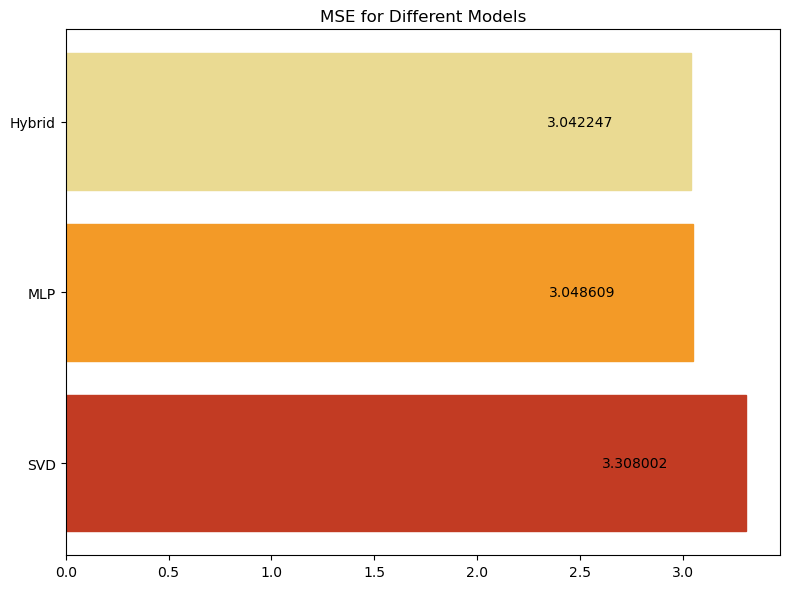

In [73]:
svd_mse = mean_squared_error(df_hybrid_evaluation['SVD Predicted Rating'],df_hybrid_evaluation['Book-Rating'])
mlp_mse = mean_squared_error(df_hybrid_evaluation['MLP Predicted Rating'],df_hybrid_evaluation['Book-Rating'])
hybrid_mse = mean_squared_error(df_hybrid_evaluation['Weighted Average'],df_hybrid_evaluation['Book-Rating'])

metrics = [svd_mse,mlp_mse,hybrid_mse]
model_labels = ['SVD', 'MLP', 'Hybrid']
colours = ['#C23B23','#F39A27','#EADA92']
plt.figure(figsize=(8, 6))

bars = plt.barh(model_labels, metrics)

for i, bar in enumerate(bars):
    plt.text(bar.get_width() - 0.7, bar.get_y() + bar.get_height() / 2, f'{metrics[i]:.6f}', va='center')
    bar.set_color(colours[i])

plt.title('MSE for Different Models')
plt.tight_layout()
plt.show()

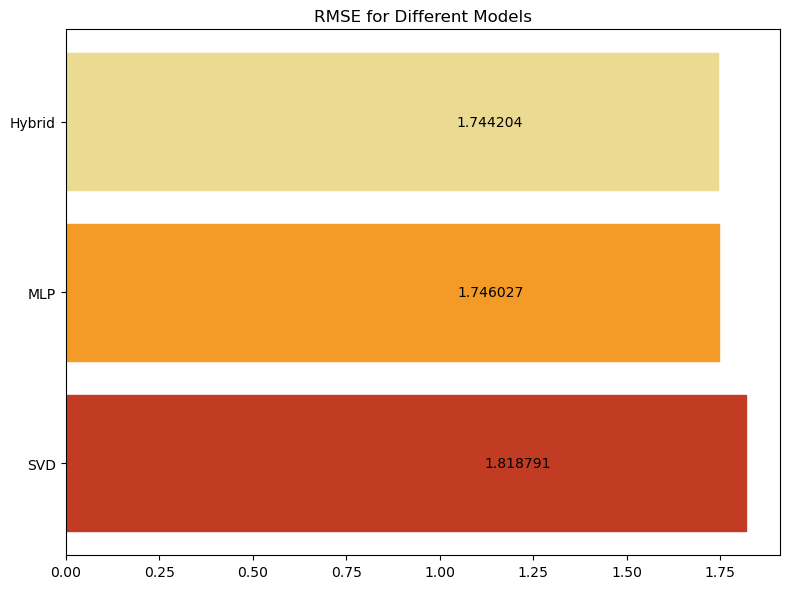

In [71]:
svd_rmse = sqrt(mean_squared_error(df_hybrid_evaluation['SVD Predicted Rating'],df_hybrid_evaluation['Book-Rating']))
mlp_rmse = sqrt(mean_squared_error(df_hybrid_evaluation['MLP Predicted Rating'],df_hybrid_evaluation['Book-Rating']))
hybrid_rmse = sqrt(mean_squared_error(df_hybrid_evaluation['Weighted Average'],df_hybrid_evaluation['Book-Rating']))

metrics = [svd_rmse,mlp_rmse,hybrid_rmse]
model_labels = ['SVD', 'MLP', 'Hybrid']
colours = ['#C23B23','#F39A27','#EADA92']
plt.figure(figsize=(8, 6))

bars = plt.barh(model_labels, metrics)

for i, bar in enumerate(bars):
    plt.text(bar.get_width() - 0.7, bar.get_y() + bar.get_height() / 2, f'{metrics[i]:.6f}', va='center')
    bar.set_color(colours[i])

plt.title('RMSE for Different Models')
plt.tight_layout()
plt.show()

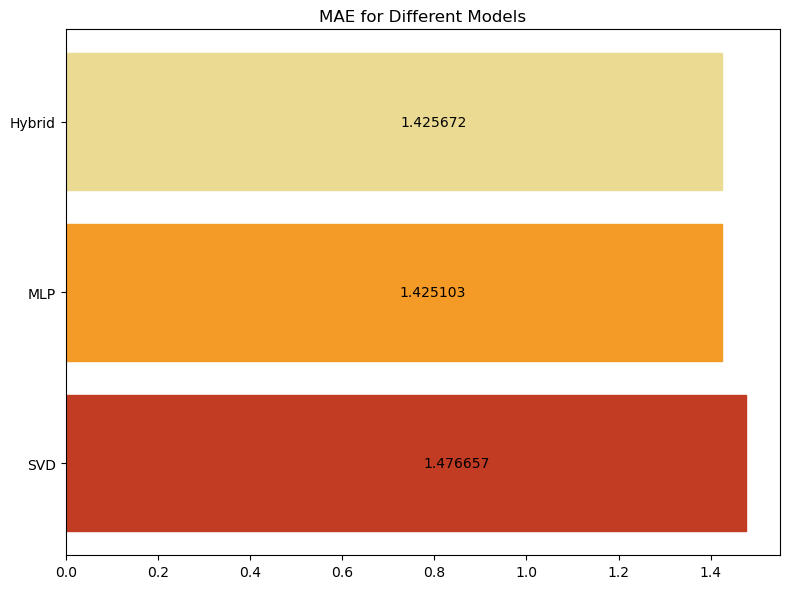

In [72]:
from sklearn.metrics import mean_absolute_error

svd_mae = mean_absolute_error(df_hybrid_evaluation['SVD Predicted Rating'],df_hybrid_evaluation['Book-Rating'])
mlp_mae = mean_absolute_error(df_hybrid_evaluation['MLP Predicted Rating'],df_hybrid_evaluation['Book-Rating'])
hybrid_mae = mean_absolute_error(df_hybrid_evaluation['Weighted Average'],df_hybrid_evaluation['Book-Rating'])

metrics = [svd_mae,mlp_mae,hybrid_mae]
model_labels = ['SVD', 'MLP', 'Hybrid']
colours = ['#C23B23','#F39A27','#EADA92']
plt.figure(figsize=(8, 6))

bars = plt.barh(model_labels, metrics)

for i, bar in enumerate(bars):
    plt.text(bar.get_width() - 0.7, bar.get_y() + bar.get_height() / 2, f'{metrics[i]:.6f}', va='center')
    bar.set_color(colours[i])

plt.title('MAE for Different Models')
plt.tight_layout()
plt.show()